In [25]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
plt.style.use('ggplot')
plt.rc('font', size=18)

In [27]:
connection_args = {
    'host':'100.24.43.200',
    'user':'ubuntu',
    'dbname':'mid',
    'port':5432
}
connection = pg.connect(**connection_args)

In [28]:
def is_prime(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

def largestPrimeFactor(n):
    for i in range(n,1,-1):
        if n%i==0:
            if is_prime(i):
                return i

In [13]:
#query = "SELECT * FROM mida"
#midb = pd_sql.read_sql(query, connection)

In [63]:
midb = pd.read_stata('MID4/MIDB_4_3.dta')

In [64]:
midb.head()

,dispnum3,dispnum4,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,sidea,revstate,revtype1,revtype2,fatality,fatalpre,hiact,hostlev,orig,version
0,2,-9,UKG,200,-9,7,1902,24,1,1903,0,1,1,-9,0,0,0,1,1,4.3
1,2,-9,USA,2,-9,7,1902,24,1,1903,1,1,1,-9,0,0,7,3,1,4.3
2,3,-9,YUG,345,2,5,1913,25,10,1913,0,0,0,-9,0,0,0,1,1,4.3
3,3,-9,AUH,300,2,5,1913,25,10,1913,1,1,2,-9,0,0,8,3,1,4.3
4,4,-9,ALB,339,15,5,1946,13,11,1946,1,0,0,-9,0,0,16,4,1,4.3


In [65]:
midb.columns

Index(['dispnum3', 'dispnum4', 'stabb', 'ccode', 'stday', 'stmon', 'styear',
       'endday', 'endmon', 'endyear', 'sidea', 'revstate', 'revtype1',
       'revtype2', 'fatality', 'fatalpre', 'hiact', 'hostlev', 'orig',
       'version'],
      dtype='object')

In [66]:
midb.rename(columns={'dispnum3':'dispute_number_v3', 
                     'dispnum4':'dispute_number_v4',
                     'stabb':'state_abbriviated',
                     'ccode':'country_code',
                     'stday':'start_day', 
                     'stmon':'start_month', 
                     'styear':'start_year', 
                     'endday':'end_day',
                     'endmon':'end_month',
                     'endyear':'end_year',
                     'sidea':'is_side_a',
                     'revstate':'is_revisionist_state',
                     'revtype1':'revision_type_1',
                     'revtype2':'revision_type_2',
                     'fatality':'fatality_bucket',
                     'fatalpre':'fatalities_number',
                     'hiact':'highest_hostile_action[hostility_level]',
                     'hostlev':'hostility_level',
                     'orig':'dispute_originator',
                     'version':'dataset_version'
                    }, inplace=True)

In [67]:
midb.replace(to_replace=-9,value=np.nan, inplace=True)

In [80]:
midb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 5557
Data columns (total 18 columns):
dispute_number_v3                          5558 non-null int16
state_abbriviated                          5558 non-null object
country_code                               5558 non-null int16
start_day                                  5558 non-null float64
start_month                                5558 non-null int8
start_year                                 5558 non-null int16
end_day                                    5558 non-null float64
end_month                                  5558 non-null int8
end_year                                   5558 non-null int16
is_side_a                                  5558 non-null int8
is_revisionist_state                       5558 non-null int8
revision_type_1                            5558 non-null int8
fatality_bucket                            5558 non-null float64
highest_hostile_action[hostility_level]    5558 non-null int8
hostility_

In [69]:
midb.drop('dispute_number_v4', inplace=True, axis=1)

In [70]:
midb.drop('revision_type_2', inplace=True, axis=1)

In [71]:
midb['start_day'].replace(to_replace=np.nan,value=15, inplace=True)

In [72]:
midb['end_day'].replace(to_replace=np.nan,value=15, inplace=True)

In [73]:
##4154of5558
midb.drop(['fatalities_number'], inplace=True, axis=1)

In [74]:
midb.drop(['dataset_version'], inplace=True, axis=1)

In [75]:
midb['mid_start'] = pd.to_datetime(dict(year=midb.start_year, month=midb.start_month, day=midb.start_day))

In [76]:
midb['mid_end'] = pd.to_datetime(dict(year=midb.end_year, month=midb.end_month, day=midb.end_day))

In [77]:
midb['fatality_bucket'].replace(to_replace=np.nan, value=999, inplace=True)

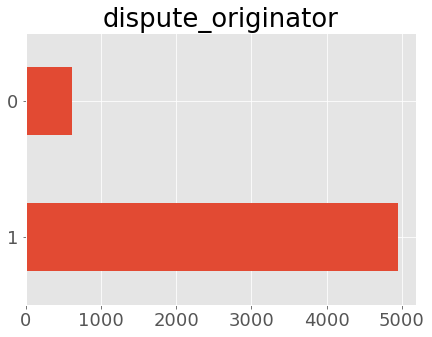

In [50]:
ax = midb['dispute_originator'].value_counts().plot(kind='barh', figsize=(7,5), title='dispute_originator')
#ax.text(268,0,str(mida['outcome'].value_counts()[1]))
#ax.text(168,1,str(mida['outcome'].value_counts()[0]))

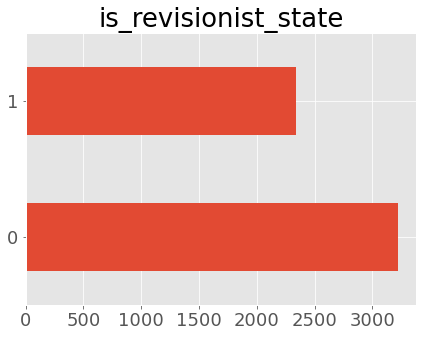

In [53]:
ax = midb['is_revisionist_state'].value_counts().plot(kind='barh', figsize=(7,5), title='is_revisionist_state')
#ax.text(268,0,str(mida['outcome'].value_counts()[1]))
#ax.text(168,1,str(mida['outcome'].value_counts()[0]))
#ax.legend(['1:Negotioated', '2:Imposed', '3:None', '4: Unclear']);
#(line1, line2, line3), ('label1', 'label2', 'label3'))

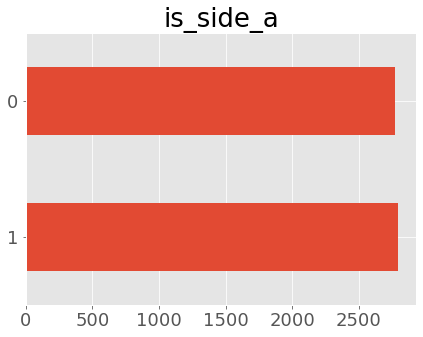

In [55]:
ax = midb['is_side_a'].value_counts().plot(kind='barh', figsize=(7,5), title='is_side_a')
#ax.text(268,0,str(mida['outcome'].value_counts()[1]))
#ax.text(168,1,str(mida['outcome'].value_counts()[0]))
#ax.legend(['1:Negotioated', '2:Imposed', '3:None', '4: Unclear']);
#(line1, line2, line3), ('label1', 'label2', 'label3'))

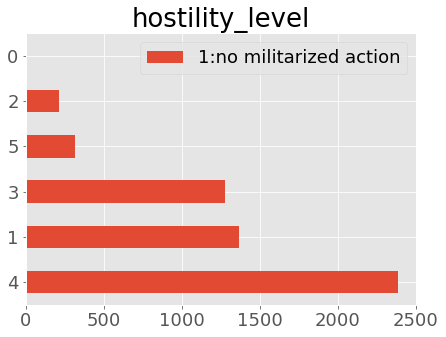

In [57]:
ax = midb['hostility_level'].value_counts().plot(kind='barh', figsize=(7,5), title='hostility_level')
ax.legend(['1:no militarized action', '2:Threat to use force', '3:Display force', '4:Use of Force, 5: War']);

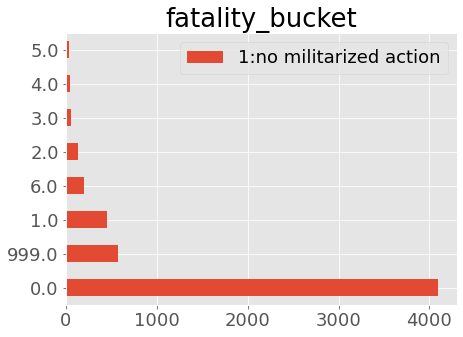

In [62]:
ax = midb['fatality_bucket'].value_counts().plot(kind='barh', figsize=(7,5), title='fatality_bucket')
ax.legend(['1:no militarized action', '2:Threat to use force', '3:Display force', '4:Use of Force, 5: War']);

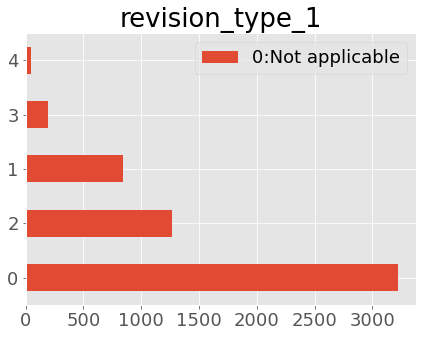

In [61]:
ax = midb['revision_type_1'].value_counts().plot(kind='barh', figsize=(7,5), title='revision_type_1')
ax.legend(['0:Not applicable', '1:Territory', '2:Policy', '3:Regime/government', '4:Other']);

In [115]:
mida.columns

Index(['dispute_number_v3', 'start_day', 'start_month', 'start_year',
       'end_day', 'end_month', 'end_year', 'outcome', 'settle',
       'fatality_bucket', 'maximum_diration', 'minimum_duration',
       'highest_hostile_action[hostility_level]', 'hostility_level', 'recip',
       'number_states_side_a', 'number_states_side_b',
       'related_dispute_number_1', 'related_dispute_number_2',
       'related_dispute_number_3', 'ongoing_2010', 'mid_start', 'mid_end'],
      dtype='object')

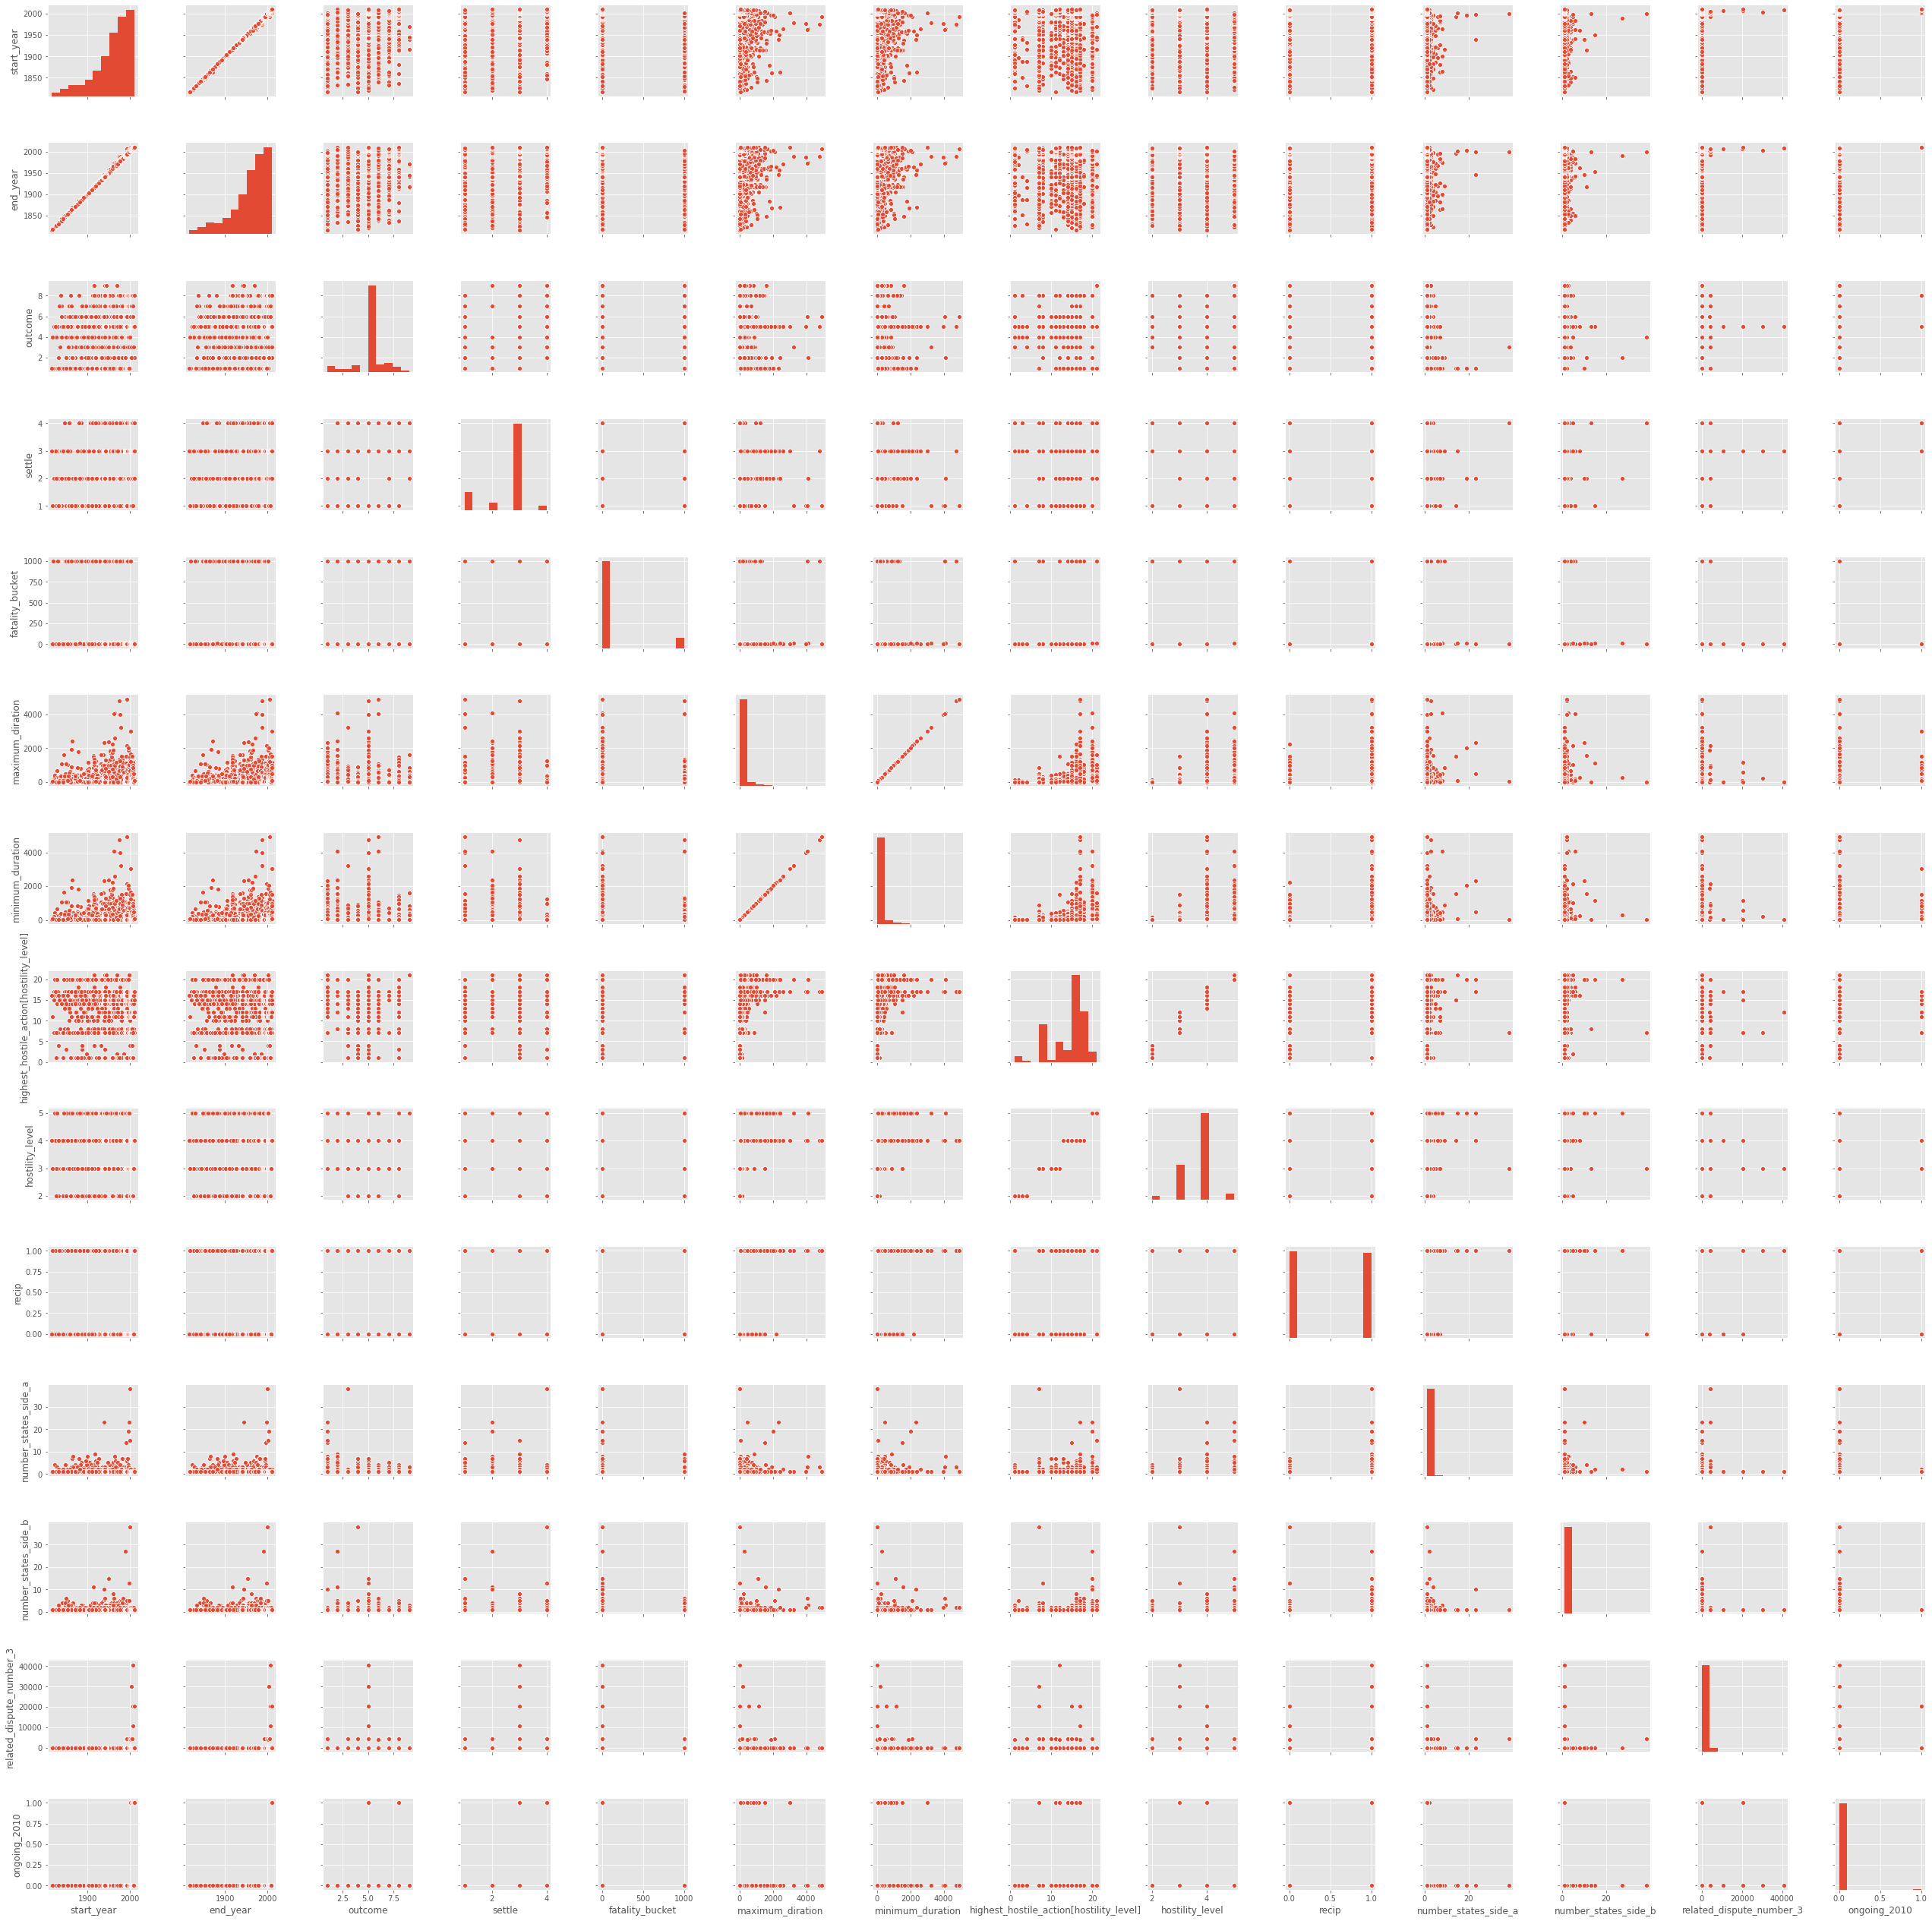

In [116]:
sns.pairplot(mida[[ 'start_year',
        'end_year', 'outcome', 'settle',
       'fatality_bucket', 'maximum_diration', 'minimum_duration',
       'highest_hostile_action[hostility_level]', 'hostility_level', 'recip',
       'number_states_side_a', 'number_states_side_b',
       'related_dispute_number_1', 'related_dispute_number_2',
       'related_dispute_number_3', 'ongoing_2010', 'mid_start', 'mid_end']])

In [81]:
midb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 5557
Data columns (total 18 columns):
dispute_number_v3                          5558 non-null int16
state_abbriviated                          5558 non-null object
country_code                               5558 non-null int16
start_day                                  5558 non-null float64
start_month                                5558 non-null int8
start_year                                 5558 non-null int16
end_day                                    5558 non-null float64
end_month                                  5558 non-null int8
end_year                                   5558 non-null int16
is_side_a                                  5558 non-null int8
is_revisionist_state                       5558 non-null int8
revision_type_1                            5558 non-null int8
fatality_bucket                            5558 non-null float64
highest_hostile_action[hostility_level]    5558 non-null int8
hostility_

In [97]:
sidea = midb[midb['is_side_a'] == 1]

In [98]:
sideb = midb[midb['is_side_a'] == 0]

In [99]:
sides.shape

(2790, 36)

In [100]:
sidea = sidea.add_suffix('_a')

In [101]:
sideb = sideb.add_suffix('_b')

In [102]:
sides = pd.concat([sideb, sidea], axis=1)

In [103]:
sides.columns

Index(['dispute_number_v3_b', 'state_abbriviated_b', 'country_code_b',
       'start_day_b', 'start_month_b', 'start_year_b', 'end_day_b',
       'end_month_b', 'end_year_b', 'is_side_a_b', 'is_revisionist_state_b',
       'revision_type_1_b', 'fatality_bucket_b',
       'highest_hostile_action[hostility_level]_b', 'hostility_level_b',
       'dispute_originator_b', 'mid_start_b', 'mid_end_b',
       'dispute_number_v3_a', 'state_abbriviated_a', 'country_code_a',
       'start_day_a', 'start_month_a', 'start_year_a', 'end_day_a',
       'end_month_a', 'end_year_a', 'is_side_a_a', 'is_revisionist_state_a',
       'revision_type_1_a', 'fatality_bucket_a',
       'highest_hostile_action[hostility_level]_a', 'hostility_level_a',
       'dispute_originator_a', 'mid_start_a', 'mid_end_a'],
      dtype='object')

In [ ]:
sides_clean = sides[['dispute_number_v3_b', 'state_abbriviated_b', 'country_code_b',
       'start_day_b', 'start_month_b', 'start_year_b', 'end_day_b',
       'end_month_b', 'end_year_b', 'is_side_a_b', 'is_revisionist_state_b',
       'revision_type_1_b', 'fatality_bucket_b',
       'highest_hostile_action[hostility_level]_b', 'hostility_level_b',
       'dispute_originator_b', 'mid_start_b', 'mid_end_b',
       'dispute_number_v3_a', 'state_abbriviated_a', 'country_code_a',
       'start_day_a', 'start_month_a', 'start_year_a', 'end_day_a',
       'end_month_a', 'end_year_a', 'is_side_a_a', 'is_revisionist_state_a',
       'revision_type_1_a', 'fatality_bucket_a',
       'highest_hostile_action[hostility_level]_a', 'hostility_level_a',
       'dispute_originator_a', 'mid_start_a', 'mid_end_a']]

In [106]:
sidea

,dispute_number_v3_a,state_abbriviated_a,country_code_a,start_day_a,start_month_a,start_year_a,end_day_a,end_month_a,end_year_a,is_side_a_a,is_revisionist_state_a,revision_type_1_a,fatality_bucket_a,highest_hostile_action[hostility_level]_a,hostility_level_a,dispute_originator_a,mid_start_a,mid_end_a
1,2,USA,2,15.0,7,1902,24.0,1,1903,1,1,1,0.0,7,3,1,1902-07-15,1903-01-24
3,3,AUH,300,2.0,5,1913,25.0,10,1913,1,1,2,0.0,8,3,1,1913-05-02,1913-10-25
4,4,ALB,339,15.0,5,1946,13.0,11,1946,1,0,0,0.0,16,4,1,1946-05-15,1946-11-13
6,7,UKG,200,13.0,10,1951,26.0,1,1952,1,0,0,1.0,17,4,1,1951-10-13,1952-01-26
9,8,UKG,200,15.0,7,1856,14.0,3,1857,1,1,2,6.0,20,5,1,1856-07-15,1857-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,4598,USA,2,27.0,9,2010,26.0,11,2010,1,1,2,0.0,17,4,1,2010-09-27,2010-11-26
5550,4599,IRN,630,12.0,10,2010,3.0,12,2010,1,0,0,0.0,15,4,1,2010-10-12,2010-12-03
5553,3115,USR,365,19.0,5,1980,19.0,5,1980,1,1,3,0.0,7,3,1,1980-05-19,1980-05-19
5554,3833,ARG,160,13.0,12,1939,13.0,12,1939,1,0,0,0.0,7,3,1,1939-12-13,1939-12-13


In [105]:
sidea.to_csv('MID4/midb_sidea.csv')

In [107]:
sideb.to_csv('MID4/midb_sideb.csv')